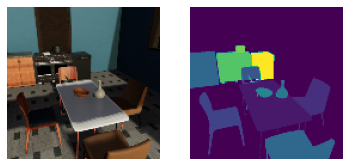

In [22]:
import matplotlib.pyplot as plt
import torch
from datasets import TDWRoomDataset

local = not torch.cuda.is_available()
syq_path = "/Users/melkor/Documents/datasets"
wys_path = "/data3/guofang/Meta/Benchmark/MultiPaperQA/wys_try/datasets"
dataset_dir = syq_path if local else wys_path

resolution = (128,128)
W, H = resolution
B, N, K = 1, W * H, 5
M = 5

name = "TDWKitchen"
dataset = TDWRoomDataset(name,resolution = resolution, root_dir = dataset_dir, split = "train")
loader = torch.utils.data.DataLoader(dataset, batch_size = B, shuffle = False)
for sample in loader:break;
"""load the dataset and make the ideal images and masks"""

ims = sample["img"]
target_masks = sample["masks"]

plt.subplot(121)
plt.axis("off")
plt.imshow(ims[0].permute(1,2,0))
plt.subplot(122)
plt.axis("off")
plt.imshow(target_masks[0])
plt.savefig("gt_mask.png", bbox_inches = "tight")
plt.show()

In [23]:
model_name = "toy128_level3"
device = "cpu"
model = torch.load("checkpoints/{}.ckpt".format(model_name),map_location = device)

torch.Size([16384])
torch.Size([1271])
torch.Size([306])
torch.Size([1, 16384])
torch.Size([1, 16384])
torch.Size([1, 16384])


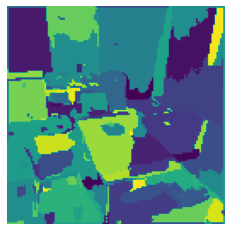

In [27]:
outputs = model(ims.permute(0,2,3,1))

from torch_geometric.utils import to_dense_batch
for i,key in enumerate(outputs["clusters"]):
    print(outputs["clusters"][i][0].shape)
    #plt.imshow(outputs["clusters"][i])

clusters = outputs["clusters"]

cluster_imgs = []
for i,(cluster,_) in enumerate(clusters):
    for cluster_j,_ in reversed(clusters[:i+1]): cluster = cluster[cluster_j]
    pix_2_cluster = to_dense_batch(cluster,clusters[0][1])[0]
    print(pix_2_cluster.shape)
    plt.cla()
    plt.axis("off")
    plt.imshow(pix_2_cluster.reshape(128,128))
plt.savefig("mask.png", bbox_inches = "tight")
plt.show()
